Module 4: Model Development

Model can be thought as an mathematical equation used to predict a value given one or more values. It is relation between one or more independent variable and dependent variable

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

1. Linear Regression and Multiple Linear Regression
Linear Regression
One example of a Data Model that we will be using is

Simple Linear Regression.
Simple Linear Regression is a method to help us understand the relationship between two variables:

The predictor/independent variable (X)
The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠
Linear function:
𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋
a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit



In [1]:
#Access loacl data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os #to change the working directory
os.chdir("D:\python introduction\data science with python\datset")
df=pd.read_csv("clean_df.csv") 
df.head(10)

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,3,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,4,2,122.0,audi,gas,std,two,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250
5,5,1,158.0,audi,gas,std,four,sedan,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710
6,6,1,122.0,audi,gas,std,four,wagon,fwd,front,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920
7,7,1,158.0,audi,gas,turbo,four,sedan,fwd,front,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875
8,9,2,192.0,bmw,gas,std,two,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430
9,10,0,192.0,bmw,gas,std,four,sedan,rwd,front,...,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16925


In [2]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression() # formate of lm is LinearRegression
X = df[['highway-mpg']]
Y = df['price']

#Fit the linear model using highway-mpg.
lm.fit(X,Y)
print("intercept is",lm.intercept_)
print("slop is",lm.coef_)

intercept is 38470.63700549667
slop is [-822.82843203]


Thus final extimated model is 
price = 38470.31 - 822.73 x highway-mpg

In [3]:
#We can output a prediction
Yhat=lm.predict(X) # this function is used to predict the price parameter x is array
print("predicted price for 0 to 4 index value is ",Yhat[0:5])
print("actual values are",Y[0:5])

predicted price for 0 to 4 index value is  [16254.26934067 17077.0977727  13785.78404458 20368.41150083
 17899.92620473]
actual values are 0    16500
1    16500
2    13950
3    17450
4    15250
Name: price, dtype: int64


Multiple Linear Regression
What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

𝑌:𝑅𝑒𝑠𝑝𝑜𝑛𝑠𝑒 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑋1:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑋2:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑋3:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑋4:𝑃𝑟𝑒𝑑𝑖𝑐𝑡𝑜𝑟 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
𝑎:𝑖𝑛𝑡𝑒𝑟𝑐𝑒𝑝𝑡𝑏1:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 1𝑏2:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 2𝑏3:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 3𝑏4:𝑐𝑜𝑒𝑓𝑓𝑖𝑐𝑖𝑒𝑛𝑡𝑠 𝑜𝑓 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒 4
The equation is given by

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋3+𝑏4𝑋4

From the previous section we know that other good predictors of price could be:

Horsepower
Curb-weight
Engine-size
Highway-mpg
Let's develop a model using these variables as the predictor variables.


In [4]:
#define the array to use as variables Z
lm1 = LinearRegression()
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
df.dtypes
lm1.fit(Z, df['price'])
print(lm1.intercept_)
lm1.coef_

-15807.307965154325


array([53.59649869,  4.70573919, 81.48768427, 36.12867113])

What is the linear function we get in this example?

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

In [5]:
#predit values
#We can output a prediction
Y_predict_multifit=lm1.predict(Z) # this function is used to predict the price parameter x is array
print("predicted price for 0 to 4 index value is ",Y_predict_multifit[0:5])
print("actual values are",Y[0:5])

predicted price for 0 to 4 index value is  [13700.99992459 19056.32802863 10622.86511077 15522.45268614
 13871.13688239]
actual values are 0    16500
1    16500
2    13950
3    17450
4    15250
Name: price, dtype: int64


Part 3: Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:

Quadratic - 2nd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2
Cubic - 3rd order
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3
Higher order:
𝑌=𝑎+𝑏1𝑋+𝑏2𝑋2+𝑏3𝑋3....
We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [6]:
#lets get the variables
x = df['highway-mpg']
y = df['price']
f=np.polyfit(x, y, 3)
p= np.poly1d(f)
print(p)

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


In [7]:
y_poly_predict=p(x)
print(y_poly_predict[0:5])
print("actual values:",y[0:5])

[14493.09465904 15886.4681412  11218.23390201 23217.00549364
 17446.23556794]
actual values: 0    16500
1    16500
2    13950
3    17450
4    15250
Name: price, dtype: int64


The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋1^2+𝑏5𝑋2^2

For multivariate polynomial regression: we need to follow three steps
1. normalize all attributes
2. Find features
3. find coefficients using linear regression


Pipeline
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(2)), ('model',LinearRegression())]
#we input the list as an argument to the pipeline constructo
pipe=Pipeline(Input)
pipe


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [9]:
#We can normalize the data, perform a transform and fit the model simultaneously.
pipe.fit(Z,y)


Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [10]:
#Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13095.3683245 , 18224.95716349, 10388.16455605, 16123.27954832])

Evaluation technique using statisitcs: Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

R^2=1-(RSS/TSS), RSS is difference between actual value and prdicted value, TSS is difference between actual value and mean of actual value
The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

Model 1: Simple Linear Regression
Let's calculate the R^2

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Simple linear reg model
print("Linear regression model:")
print('R2: ', r2_score(df['price'], Yhat))
print('MSE: ', mean_squared_error(df['price'], Yhat))

#multi linear regression
print("mutli linear regression model:")
print('R2: ', r2_score(df['price'],  Y_predict_multifit))
print('MSE: ', mean_squared_error(df['price'], Y_predict_multifit))

#polynomial regression
print("polynomial regression:")
print('R2: ',r2_score(y, p(x)))
print('MSE:',mean_squared_error(y, p(x)))

#multipolynomial regression
print("multipolynomial regression:")
print('R2: ',r2_score(y, ypipe))
print('MSE:',mean_squared_error(y, ypipe))

Linear regression model:
R2:  0.49718675257265266
MSE:  31755395.41081296
mutli linear regression model:
R2:  0.8094176067158593
MSE:  12036316.242744625
polynomial regression:
R2:  0.6742706265540409
MSE: 20571584.18879441
multipolynomial regression:
R2:  0.8463595428806852
MSE: 9703231.75032667


Multipolynomial regression model has maxium R2 value and minimum MSE that is why it is best fit model for price prediction

Evaluation based on visualization:
histogram: histogram which fits best with actual values is best fit model

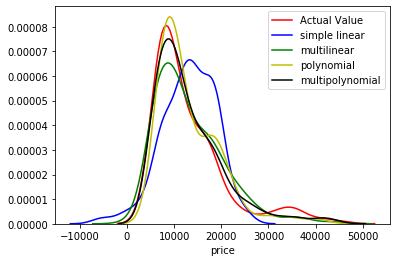

In [12]:
sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="simple linear" )
sns.distplot(Y_predict_multifit, hist=False, color="g", label="multilinear" )
sns.distplot(p(x), hist=False, color="y", label="polynomial" )
sns.distplot(ypipe, hist=False, color="k", label="multipolynomial" )

Out data evaluation:
    1.test data, train data
    2.cross validation
    3.ridge regression
    4.Grid search

In [13]:
#1.divide dataset in test data and train data
#divide x_data and y_data
y_data = df['price']
x_data=df.drop('price',axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)
#random_state=1 gives you different results everytime

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 30
number of training samples: 170


In [14]:
#find R2 score for simple linear regression model
lm.fit(x_train[['highway-mpg']], y_train)

#for train data MSE is 
Yhat=lm.predict(x_train[['highway-mpg']])
r2_score(y_train, Yhat)


0.511501217392754

In [15]:
Yhat=lm.predict(x_test[['highway-mpg']])
r2_score(y_test, Yhat)

0.28008311684944087

exercise: do same thing for other three models and find best match

Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Cross-validation divides data in equal size sections and take one section as test data and other data as training set in each round. Find average of all rounds and gives output. By default it calculates R2 but negative mean squared error can also be computed

In [16]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lm, x_data[['highway-mpg']], y_data, cv=4)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

[0.56379294 0.50663752 0.35917242 0.11951847]
The mean of the folds are 0.3872803355199643 and the standard deviation is 0.17167506181948017


In [17]:
#to calculatet MSE
-1 * cross_val_score(lm,x_data[['highway-mpg']], y_data,cv=4,scoring='neg_mean_squared_error')

array([39984156.157719  , 44699470.14227489, 31869338.27143624,
       16249357.76902875])

In [18]:
#to predict using cross validation model
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lm,x_data[['highway-mpg']], y_data,cv=4)
yhat[0:5]

array([15702.62111965, 16477.14151726, 13379.05992683, 19575.22310768,
       17251.66191486])

Exercise: Do this for other three models

Underfitting overfitng of model:
    
Underfitting: is has high error in train data and test data both

Overfitting: it has low error for train data and high error for test data

In [20]:
lm1 = LinearRegression()
Z = x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
df.dtypes
lm1.fit(Z, y_train)
print(lm1.intercept_)
lm1.coef_

-14871.132588081973


array([53.24111057,  4.45223293, 85.06711379, 13.03661839])

In [21]:
Y_predict_multifit=lm1.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [23]:
print('r2: ', r2_score(y_test, Y_predict_multifit))

MSE:  0.8202242744134156


In [25]:
Y_predict_multifit=lm1.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
print('r2: ', r2_score(y_train, Y_predict_multifit))


MSE:  0.8062859461880554


this model is good fit, simple linear model is underfit

In [54]:
#simple polynomial model
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
f = np.polyfit(x_train['horsepower'], y_train,3 ) 
poly = np.poly1d(f)
print(poly)



         3         2
0.05171 x - 17.44 x + 2020 x - 6.652e+04


In [55]:
r_squared = r2_score(y_train, poly(x_train['horsepower']))
print('The R-square value is: ', r_squared)

The R-square value is:  0.7057436248440312


In [56]:
yhat = poly(x_test['horsepower'])
print('r2: ', r2_score(y_test,yhat))

r2:  -4.423223314167557


this model is called overfitting. we have to apply ridge regression to overcoe this

In [59]:
pr=PolynomialFeatures(degree=3)
x_train_pr=pr.fit_transform(x_train[['horsepower']])
x_test_pr=pr.fit_transform(x_test[['horsepower']])

In [64]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
r_squared = r2_score(y_test, yhat )
print('The R-square value is: ', r_squared)

The R-square value is:  -4.328964038771078


In [67]:
#lasso model
from sklearn.linear_model import Lasso
model = Lasso(alpha=1)
model.fit(x_train_pr, y_train)
yhat = model.predict(x_test_pr)
r_squared = r2_score(y_test, yhat )
print('The R-square value is: ', r_squared)

The R-square value is:  0.038557688544398006


C:\Users\Chirag\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130844341.8953564, tolerance: 691914.910499091
  positive)
